# Classification Project

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
from nltk.corpus import stopwords

In [3]:
#Reading the dataset
df=pd.read_csv('/Users/afsoon/Documents/Data/DataScienceRoadmap/email/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# Exploratory Data Analysis

In [4]:
df.shape

(5728, 2)

In [5]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
df.isnull().sum()

text    0
spam    0
dtype: int64

<AxesSubplot:xlabel='spam', ylabel='count'>

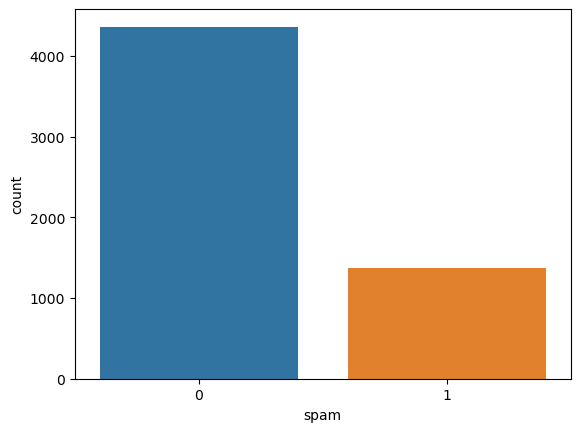

In [7]:
sns.countplot(df,x='spam')

Text(0.5, 1.0, 'Ham and Spam email after downsampling')

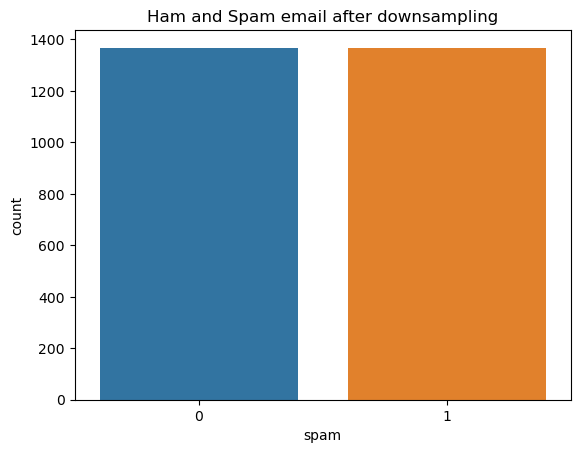

In [8]:
#It shows that the dataset is unbalansed
#Downsampling to balance the dataset
ham_msg=df[df['spam']==0]
spam_msg=df[df['spam']==1]

ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)

#Creating balance dataset
balanced_data=pd.merge(ham_msg, spam_msg, how='outer')

#Plotting the counts of down sampled dataset
sns.countplot(balanced_data,x='spam')
plt.title('Ham and Spam email after downsampling')

In [9]:
#Removing 'subject' from the text
balanced_data['text']=balanced_data['text'].str.replace('Subject','')
balanced_data.head()

,text,spam
0,: interview schedule for jinbaek kim i didn '...,0
1,": re : wednesday meeting eric , i think we c...",0
2,: re : london research group i ' d do it as s...,0
3,": re : congratulations vince , thanks for you...",0
4,: osman sezgen steve kromer is requesting tha...,0


In [19]:
#Creating a function to remove punctuations
punctuations_list = string.punctuation
def remove_punctuation(text):
    text.replace(punctuations_list,'')
    return text

In [20]:
remove_punctuation(': interview schedule for jinbaek kim i didn')

': interview schedule for jinbaek kim i didn'

In [22]:
punctuations_list

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nltk.download('stopwords')